In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [98]:
# load the data
sample_ccy = pd.read_csv('/Users/johfoxwo/Documents/ccy.csv')

In [99]:
# Assign DataFrame
df = pd.DataFrame(sample_ccy)

In [100]:
# List column names to display the variables for anaylsis
list(df.columns.values)

['4 Jan 1999 - 27 July 2018',
 'EUR/USD',
 'USD/JPY',
 'GBP/USD',
 'AUD/USD',
 'USD/CAD']

In [101]:
# Setting up exchange rate variables 
EUR_USD, USD_JPY, GBP_USD, AUD_USD, USD_CAD = df.loc[:,'EUR/USD'],df.loc[:,'USD/JPY'],df.loc[:,'GBP/USD'],df.loc[:,'AUD/USD'],df.loc[:,'USD/CAD']

In [102]:
# sanity check on the number of values in each exchange rates 
len (EUR_USD), len (USD_JPY), len (GBP_USD), len (AUD_USD), len (USD_CAD)

(4918, 4918, 4918, 4918, 4918)

In [103]:
# Ensure all exchange rates are expressed the same way , i.e. in US Dollars . . . so need to flip these
USD_JPY.head(), USD_CAD.head()

(0    112.15
 1    111.15
 2    112.78
 3    111.69
 4    111.52
 Name: USD/JPY, dtype: float64, 0    1.5268
 1    1.5213
 2    1.5110
 3    1.5117
 4    1.5145
 Name: USD/CAD, dtype: float64)

In [104]:
# to flip the exchange rates divide with an array of ones
ones = np.ones_like(USD_JPY)

In [105]:
JPY_USD, CAD_USD = ones / USD_JPY, ones / USD_CAD

In [106]:
JPY_USD.head()

0    0.008917
1    0.008997
2    0.008867
3    0.008953
4    0.008967
Name: USD/JPY, dtype: float64

In [107]:
df.head()

,4 Jan 1999 - 27 July 2018,EUR/USD,USD/JPY,GBP/USD,AUD/USD,USD/CAD
0,1/4/1999,1.1812,112.15,1.6581,0.6182,1.5268
1,1/5/1999,1.1760,111.15,1.6566,0.6217,1.5213
2,1/6/1999,1.1636,112.78,1.6547,0.6285,1.5110
3,1/7/1999,1.1672,111.69,1.6495,0.6340,1.5117
4,1/8/1999,1.1554,111.52,1.6405,0.6326,1.5145


In [108]:
corr = df.corr()

In [109]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

Text(0.5,1,'Python Data Visualzation of a Correlation Matrix Heatmap:  \nSome of the Most Traded Currencies in the World from 4 Jan 1999 to 27 July 2018')

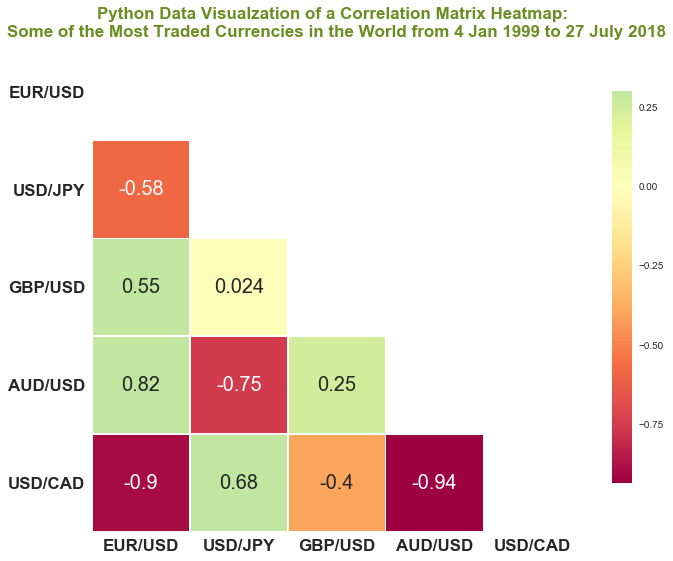

In [110]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=.3, center=0, annot_kws={"size": 20}, 
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.yticks(rotation=0, fontweight='bold', fontsize=17)
plt.xticks(fontweight='bold', fontsize=17)
plt.title('Python Data Visualzation of a Correlation Matrix Heatmap:  \nSome of the Most Traded Currencies in the World from 4 Jan 1999 to 27 July 2018',
          fontweight='bold', fontsize=17,color='olivedrab')

In [111]:
df.head()

,4 Jan 1999 - 27 July 2018,EUR/USD,USD/JPY,GBP/USD,AUD/USD,USD/CAD
0,1/4/1999,1.1812,112.15,1.6581,0.6182,1.5268
1,1/5/1999,1.1760,111.15,1.6566,0.6217,1.5213
2,1/6/1999,1.1636,112.78,1.6547,0.6285,1.5110
3,1/7/1999,1.1672,111.69,1.6495,0.6340,1.5117
4,1/8/1999,1.1554,111.52,1.6405,0.6326,1.5145
